# Celebrity Image Classification


In [53]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Preprocessing: Detect face and eyes

In [86]:
img=cv2.imread('./test_images/ram1.jpg')
img.shape

(204, 204, 3)

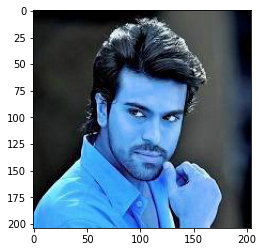

In [87]:
plt.imshow(img)

In [92]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(204, 204)

In [57]:
gray

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   1,   1,   1],
       [  0,   0,   0, ...,   1,   1,   1],
       ...,
       [193, 191, 180, ...,   1,   1,   1],
       [191, 191, 179, ...,   1,   1,   1],
       [191, 189, 178, ...,   1,   1,   1]], dtype=uint8)

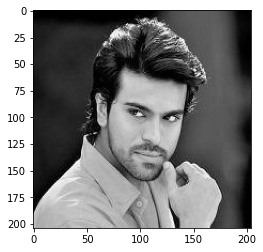

In [88]:
plt.imshow(gray,cmap='gray')

In [59]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[67, 64, 89, 89]], dtype=int32)

In [60]:
(x,y,w,h) = faces[0]
x,y,w,h

(67, 64, 89, 89)

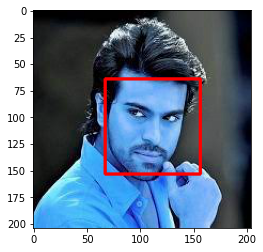

In [89]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

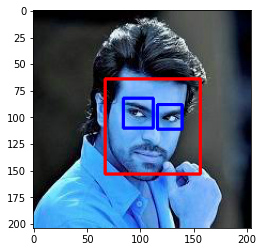

In [90]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# Preprocessing: Crop the facial region of the image

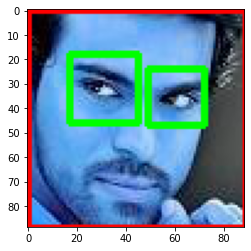

In [63]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

# (3) Preprocessing: Use wavelet transform as a feature for traning our mode

In [64]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

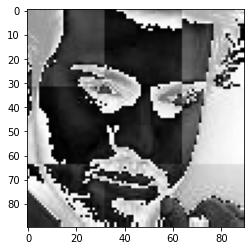

In [65]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

# (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

In [66]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

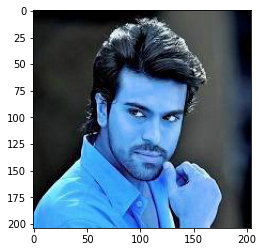

In [67]:
original_image = cv2.imread('./test_images/ram1.jpg')
plt.imshow(original_image)

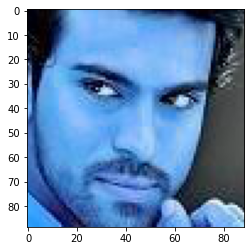

In [68]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/ram1.jpg')
plt.imshow(cropped_image)

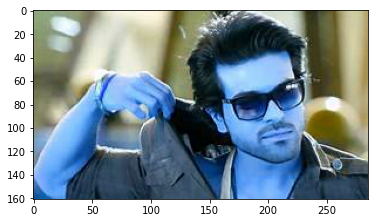

In [69]:
org_image_obstructed = cv2.imread('./test_images/ram2.jpg')
plt.imshow(org_image_obstructed)

In [70]:
cropped_image_no_eyes = get_cropped_image_if_2_eyes('./test_images/ram2.jpg')
cropped_image_no_eyes

In [73]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [74]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [75]:
img_dirs

['./dataset/cropped',
 './dataset/mega_star_chiranjeevi',
 './dataset/nandamuri_balakrishna',
 './dataset/natural_star_nani',
 './dataset/power_star_pavan_kalyan',
 './dataset/ram_charan']

In [76]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [77]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/mega_star_chiranjeevi
Generating cropped images in folder:  ./dataset/cropped/nandamuri_balakrishna
Generating cropped images in folder:  ./dataset/cropped/natural_star_nani
Generating cropped images in folder:  ./dataset/cropped/power_star_pavan_kalyan
Generating cropped images in folder:  ./dataset/cropped/ram_charan


# Now you should have cropped folder under datasets folder that contains cropped images
Manually examine cropped folder and delete any unwanted images¶

In [78]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'mega_star_chiranjeevi': ['./dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi1.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi10.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi11.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi12.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi13.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi14.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi15.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi16.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi17.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi18.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi19.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi2.png',
  './dataset/cropped/mega_star_chiranjeevi\\mega_star_chiranjeevi20.png',
  './dataset/cr

In [79]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'mega_star_chiranjeevi': 0,
 'nandamuri_balakrishna': 1,
 'natural_star_nani': 2,
 'power_star_pavan_kalyan': 3,
 'ram_charan': 4}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now¶

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [31]:
32*32*3+32*32

4096

In [32]:
len(X)

343

In [33]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(343, 4096)

In [34]:
X[0]

array([ 11.,  14.,  28., ...,   0., 248.,   3.])

## Data cleaning is done

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7325581395348837

In [37]:
len(X_test)

86

In [38]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.96      0.77      0.85        30
           2       0.73      0.76      0.74        21
           3       0.56      0.62      0.59        16
           4       0.62      0.89      0.73         9

    accuracy                           0.73        86
   macro avg       0.70      0.73      0.71        86
weighted avg       0.76      0.73      0.74        86



## Lets use Gridsearch

In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.762519,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.556486,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.782127,{'logisticregression__C': 1}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [43]:
best_estimators['svm'].score(X_test,y_test)

0.7558139534883721

In [44]:
best_estimators['random_forest'].score(X_test,y_test)

0.5930232558139535

In [45]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7674418604651163

In [46]:
best_clf = best_estimators['svm']

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  1,  0,  2,  0],
       [ 2, 23,  1,  2,  2],
       [ 1,  1, 16,  2,  1],
       [ 1,  0,  4, 10,  1],
       [ 0,  0,  0,  0,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

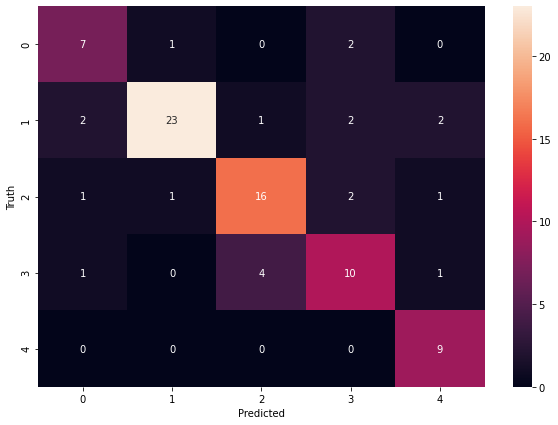

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Save the trained model

In [49]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

## Save class dictionary

In [50]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))